In [8]:
from ddpg import Agent
import gym
import numpy as np
import matplotlib.pyplot as plt

In [9]:
env = gym.make('Pendulum-v1', g=9.81)
agent = Agent(alpha=0.000025, beta=0.00025, input_dims=[3], tau=0.001, env=env,
              batch_size=64,  layer1_size=400, layer2_size=300, n_actions=1, max_action=2)

#agent.load_models()
np.random.seed(0)

score_history = []
for i in range(500):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        act = agent.choose_action(obs)
        new_state, reward, done, info = env.step(act)
        agent.remember(obs, act, reward, new_state, int(done))
        agent.learn()
        score += reward
        obs = new_state
        #env.render()
    score_history.append(score)

    #if i % 25 == 0:
    #    agent.save_models()

    print('episode ', i, 'score %.2f' % score,
          'trailing 100 games avg %.3f' % np.mean(score_history[-100:]))

episode  0 score -1239.96 trailing 100 games avg -1239.957
episode  1 score -1384.48 trailing 100 games avg -1312.221
episode  2 score -1135.52 trailing 100 games avg -1253.322
episode  3 score -1240.99 trailing 100 games avg -1250.238
episode  4 score -1657.35 trailing 100 games avg -1331.660
episode  5 score -968.24 trailing 100 games avg -1271.090
episode  6 score -966.95 trailing 100 games avg -1227.641
episode  7 score -1596.91 trailing 100 games avg -1273.801
episode  8 score -1260.87 trailing 100 games avg -1272.364
episode  9 score -902.44 trailing 100 games avg -1235.371
episode  10 score -1300.87 trailing 100 games avg -1241.326
episode  11 score -993.24 trailing 100 games avg -1220.652
episode  12 score -984.36 trailing 100 games avg -1202.475
episode  13 score -1398.88 trailing 100 games avg -1216.505
episode  14 score -968.06 trailing 100 games avg -1199.942
episode  15 score -1079.69 trailing 100 games avg -1192.426
episode  16 score -1401.77 trailing 100 games avg -1204.

Text(0.5, 1.0, 'Running average of previous 100 episodes')

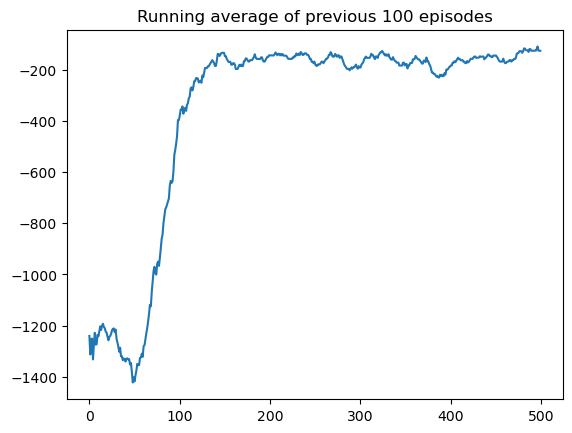

In [10]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-20):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')

In [ ]:
env = gym.make("BipedalWalker-v3")
agent = Agent(alpha=0.000025, beta=0.00025, input_dims=[24], tau=0.001, env=env,
              batch_size=64,  layer1_size=400, layer2_size=300, n_actions=4, max_action=1)

#agent.load_models()
np.random.seed(0)

score_history = []
for i in range(500):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        act = agent.choose_action(obs)
        new_state, reward, done, info = env.step(act)
        agent.remember(obs, act, reward, new_state, int(done))
        agent.learn()
        score += reward
        obs = new_state
        #env.render()
    score_history.append(score)

    #if i % 25 == 0:
    #    agent.save_models()

    print('episode ', i, 'score %.2f' % score,
          'trailing 100 games avg %.3f' % np.mean(score_history[-100:]))

In [ ]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-20):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')